In [14]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import timeit

from mdp import *
from utils import *

%matplotlib inline

np.random.seed(0)

# Small MDP

In [6]:
gridmdp_small = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])


gridlist_small = [[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]]
term_small = [(3, 2), (3, 1)]

def strat_match_pct(strat1, strat2, states):
    optimal = [strat1[state] for state in sorted(states)]
    suboptimal = [strat2[state] for state in sorted(states)]
    sm = difflib.SequenceMatcher(None,optimal,suboptimal)
    sm_ratio = sm.ratio()
    return sm_ratio

def best_policy_greedy(mdp, U):
    pi = {}
    for s in mdp.states:
        print(U[s])
        print([sum(p*U[s1] for (p, s1) in mdp.T(s, a)) for a in mdp.actions(s)])
        print(mdp.actions(s))
        pi[s] = argmax(mdp.actions(s), key=lambda a: sum(p*U[s1] for (p, s1) in mdp.T(s, a)))
    return pi

def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return np.flip(utility_array, 0)


optimal_policy_small = best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = 0.0)[0])

## Convergence curves

(0, 1)

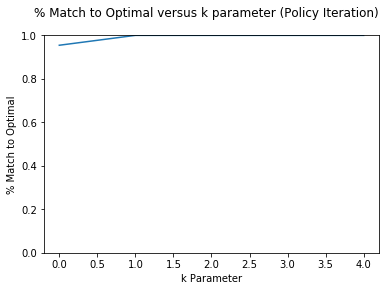

In [45]:
dist_lg = []

for k in range(1,6):
    k_list = []
    for x in range(10):
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp_small, k=k)
        match_pct = strat_match_pct(optimal_policy_small, pi, gridmdp_small.states)
        k_list.append(match_pct)
        
    dist_lg.append(sum(k_list)/len(k_list))

plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

(0, 1)

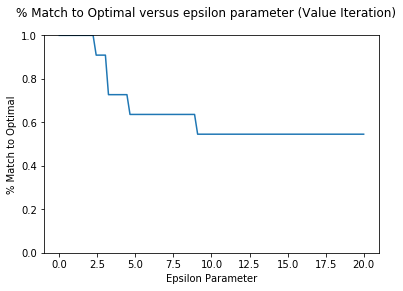

In [46]:
dist_lg = []

gridmdp_small = GridMDP(gridlist_small, terminals=term_small)
vi_converged = best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = 0.0)[0])
for ep in np.linspace(0.0,20,100):
    k_list = []
    for x in range(15):
        vi_unconverged = best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = ep)[0])
        match_pct = strat_match_pct(vi_converged, vi_unconverged, gridmdp_small.states)
        k_list.append(match_pct)
    dist_lg.append(sum(k_list)/len(k_list))

plt.plot(np.linspace(0.0,20,100),dist_lg)

plt.suptitle("% Match to Optimal versus epsilon parameter (Value Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("Epsilon Parameter")
plt.ylim((0,1))

Text(0.5,0,'Iteration number')

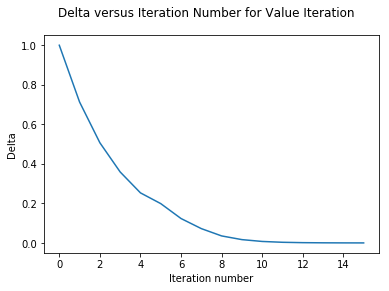

In [53]:
U_vi, vi_iter_time, vi_deltas = value_iteration(gridmdp_small)
plt.plot(vi_deltas)
plt.suptitle("Delta versus Iteration Number for Value Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")
#vi_deltas_plot.title()

In [52]:
dist_lg = []

for k in range(1,25):
    k_list = []
    for x in range(10):
        gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp, k=k)
        vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
        k_list.append(strat_match_pct(vi_converged, pi, gridmdp.states))
    dist_lg.append(sum(k_list)/len(k_list))

plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

KeyboardInterrupt: 

In [21]:
##############Put the optimal policy finder here and make sure we are hitting it for all subsequent 

optimal_policy_small = best_policy(gridmdp, value_iteration(gridmdp, epsilon = 0.0)[0])

6


'print(optimal_policy_small == best_policy(gridmdp_small, U_vis))\nprint_table(gridmdp_small.to_arrows(optimal_policy_small))\nprint_table(gridmdp_small.to_arrows(best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = eps)[0])))'

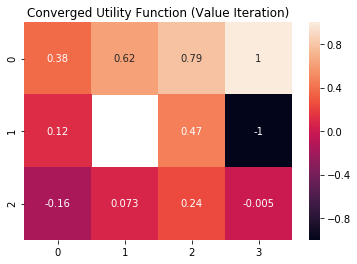

In [71]:
eps = 2.0
#eps = 0.0

U_vi, vi_iter_time, vi_deltas = value_iteration(gridmdp_small, epsilon=eps)

vi_utility_array = utility_dict_toarray(U_vi, (3,4))

utility_array_df = pd.DataFrame(vi_utility_array)
vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

U_vis, iter_time_vis, deltas_vis = value_iteration(gridmdp_small, epsilon = eps)

print(len(vi_iter_time))


"""print(optimal_policy_small == best_policy(gridmdp_small, U_vis))
print_table(gridmdp_small.to_arrows(optimal_policy_small))
print_table(gridmdp_small.to_arrows(best_policy(gridmdp_small, value_iteration(gridmdp_small, epsilon = eps)[0])))"""

[[ 0.50938684  0.64958617  0.79536224  1.        ]
 [ 0.39829737         nan  0.48644044 -1.        ]
 [ 0.296162    0.25394261  0.34477952  0.12990817]]
4
>   >      >   .
^   None   ^   .
^   >      ^   <


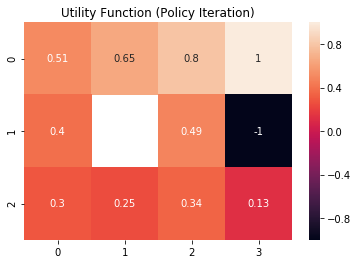

In [73]:
pi, U, pi_iter_time, deltas = policy_iteration(gridmdp_small, k=3)
pi_utility_array = utility_dict_toarray(U, (3,4))

print(pi_utility_array)

print(len(pi_iter_time))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp_small.to_arrows(pi))



#gridmdp_small.to_arrows(pi) == gridmdp_small.to_arrows(pi_gmdps)

Text(0.5,0,'Iteration number')

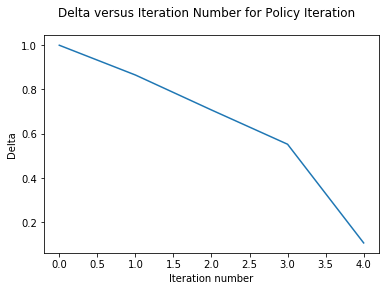

In [42]:
plt.plot(deltas)
plt.suptitle("Delta versus Iteration Number for Policy Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")    


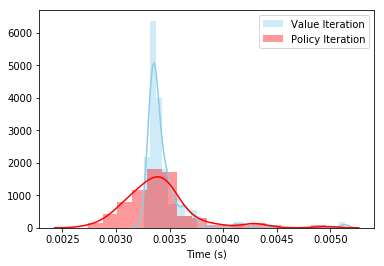

In [38]:


setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=3)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp, epsilon=1)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

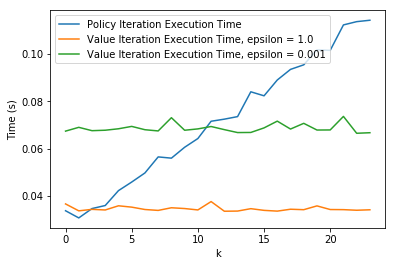

In [40]:
pi_klist = ['mdp.policy_iteration(gridmdp, k={})'.format(x) for x in range(1,25)]
pi_times, vi_times, vi_def_times = [], [], []
for k_pi_call in pi_klist:
    pi_times.append(timeit.timeit(k_pi_call, number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp, epsilon=1)', number = 100, setup=setup))
    vi_def_times.append(timeit.timeit('mdp.value_iteration(gridmdp)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time, epsilon = 1.0')
plt.plot(vi_def_times, label='Value Iteration Execution Time, epsilon = 0.001')
plt.legend()
plt.xlabel("k")
plt.ylabel("Time (s)")

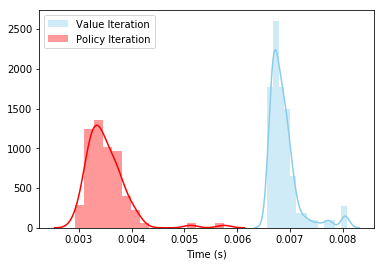

In [41]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = 0.9)
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=3)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

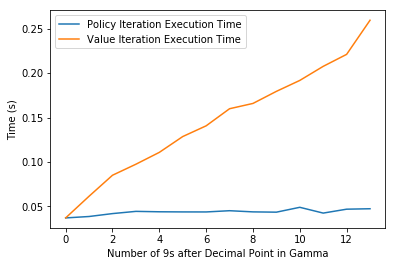

In [52]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format("0." + x*"9") for x in range(1,15)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=3)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp, epsilon=1.0)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Number of 9s after Decimal Point in Gamma")
plt.ylabel("Time (s)")

Text(0,0.5,'Time (s)')

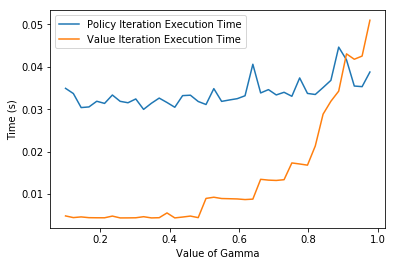

In [53]:

setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)],  gamma = {})
'''

setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=3)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp, epsilon=1.0)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")

In [ ]:
dist_sm = []

for gamma in np.linspace(0.01,0.99,20):
    gridmdp = GridMDP(gridlist, terminals=term, gamma=gamma)
    vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
    vi_unconverged = best_policy(gridmdp, value_iteration(gridmdp, 1.0)[0])
    dist_sm.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))

plt.plot(np.linspace(0.01,0.99,20), dist_sm)

plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")

# Large MDP

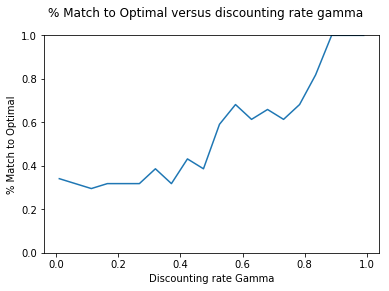

In [31]:
import difflib


gridmdp_large = GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])

dist_lg = []

for gamma in np.linspace(0.01,0.99,20):
    gridmdp = GridMDP(gridlist_large, terminals=term_large, gamma=gamma)
    vi_converged = best_policy(gridmdp, value_iteration(gridmdp, 0.0)[0])
    vi_unconverged = best_policy(gridmdp, value_iteration(gridmdp, 1.0)[0])
    dist_lg.append(strat_match_pct(vi_converged, vi_unconverged, gridmdp.states))

plt.plot(np.linspace(0.01,0.99,20), dist_lg)

plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")
plt.ylim((0,1))

optimal_policy_large = best_policy(gridmdp_large, value_iteration(gridmdp_large, epsilon = 0.0)[0])

Text(0.5,0,'Iteration number')

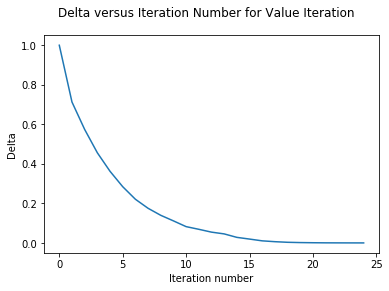

In [28]:
U_vi, vi_iter_time, vi_deltas = value_iteration(gridmdp_large)
plt.plot(vi_deltas)

plt.suptitle("Delta versus Iteration Number for Value Iteration")
plt.ylabel("Delta")
plt.xlabel("Iteration number")

1.0
1.0
1.0
1.0
1.0


(0, 1)

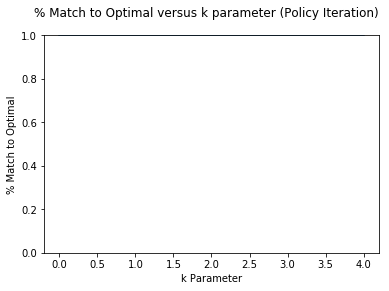

In [32]:
dist_lg = []

for k in range(1,6):
    k_list = []
    for x in range(10):
        pi, U, pi_iter_time, deltas = policy_iteration(gridmdp_large, k=k)
        k_list.append(strat_match_pct(optimal_policy_large, pi, gridmdp_large.states))
    print(sum(k_list)/len(k_list))
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(dist_lg)

plt.suptitle("% Match to Optimal versus k parameter (Policy Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("k Parameter")
plt.ylim((0,1))

In [ ]:
######################Make sure this result is correct - will k=1 find the optimal policy? 

In [36]:
mdpl_pi = policy_iteration(gridmdp_large, k=1)
print(optimal_policy_large == mdpl_pi[0])
################Make a heatmap out of the k=1 policy

True


(0, 1)

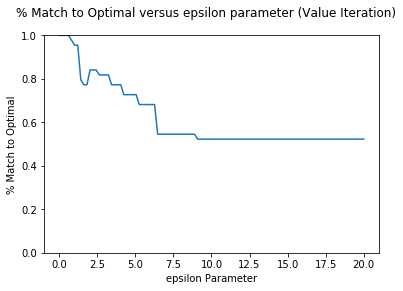

In [21]:
dist_lg = []

for ep in np.linspace(0.0,20,100):
    k_list = []
    for x in range(10):
        vi_unconverged = best_policy(gridmdp_large, value_iteration(gridmdp_large, epsilon = ep)[0])
        match_pct = strat_match_pct(optimal_policy_large, vi_unconverged, gridmdp.states)
        k_list.append(match_pct)
    dist_lg.append(sum(k_list)/len(k_list))


plt.plot(np.linspace(0.0,20,100), dist_lg)

plt.suptitle("% Match to Optimal versus epsilon parameter (Value Iteration)")
plt.ylabel("% Match to Optimal")
plt.xlabel("epsilon Parameter")
plt.ylim((0,1))

In [16]:
"""plt.plot(np.linspace(0.01,0.99,20), dist_lg)
plt.plot(np.linspace(0.01,0.99,20), dist_sm)
plt.suptitle("% Match to Optimal versus discounting rate gamma")
plt.ylabel("% Match to Optimal")
plt.xlabel("Discounting rate Gamma")
plt.ylim((0,1))"""

'plt.plot(np.linspace(0.01,0.99,20), dist_lg)\nplt.plot(np.linspace(0.01,0.99,20), dist_sm)\nplt.suptitle("% Match to Optimal versus discounting rate gamma")\nplt.ylabel("% Match to Optimal")\nplt.xlabel("Discounting rate Gamma")\nplt.ylim((0,1))'

In [17]:
pi = best_policy(gridmdp, value_iteration(gridmdp_large, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['v', None, '>', '>', 'v', None, 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['>', '^', '^', '.', '>', '>', '>', 'v'],
 ['v', None, 'v', '.', '^', None, '>', '>'],
 ['>', '>', '>', '>', '>', '>', '^', '^']]

>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


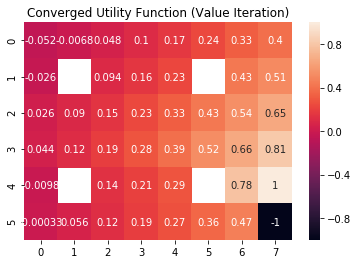

In [67]:
#vi_utility_dict, iter_time, d 
vi_mdpl = value_iteration(gridmdp_large, epsilon = 0)

vi_mdpl_utility = utility_dict_toarray(vi_mdpl[0], (6,8))

pi_mdpl = best_policy(gridmdp_large, vi_mdpl[0])

#print()

vi_mdpl_util_df = pd.DataFrame(vi_mdpl_utility)

print_table(gridmdp_large.to_arrows(pi_mdpl))
#print_table(gridmdp_large.to_arrows(pi))

vi_heatmap = sns.heatmap(vi_mdpl_util_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

13
>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


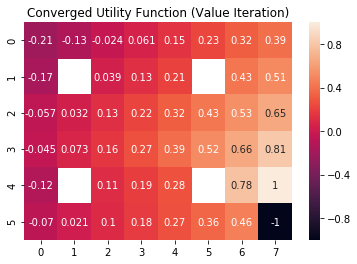

In [70]:
#vi_utility_dict, iter_time, d 
vi_mdpl = value_iteration(gridmdp_large, epsilon = 0.5)

print(len(vi_mdpl[2]))

vi_mdpl_utility = utility_dict_toarray(vi_mdpl[0], (6,8))

pi_mdpl = best_policy(gridmdp_large, vi_mdpl[0])
print_table(gridmdp_large.to_arrows(pi_mdpl))

vi_mdpl_util_df = pd.DataFrame(vi_mdpl_utility)

vi_heatmap = sns.heatmap(vi_mdpl_util_df, annot=True).set_title("Converged Utility Function (Value Iteration)")

9
True
>   >      >   >   >   >      v   v
v   None   v   v   v   None   v   v
>   >      >   >   >   >      v   v
>   >      >   >   >   >      >   v
^   None   >   >   ^   None   >   .
>   >      >   >   >   >      ^   .


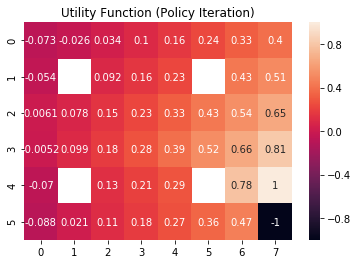

In [72]:
pi, U, pi_iter_time, d = policy_iteration(gridmdp_large, k=1)
pi_utility_array = utility_dict_toarray(U, (6,8))

print(len(pi_iter_time))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

pi_gmdpl = best_policy(gridmdp_large, value_iteration(gridmdp_large)[0])

print(pi_gmdpl == pi)

print_table(gridmdp.to_arrows(pi))

In [ ]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=1)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

In [ ]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp)', setup = setup).repeat(100,1)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp)', setup = setup).repeat(100,1)

bp = plt.boxplot([pi_time, vi_time], labels=["Value Iteration", "Policy Iteration"])

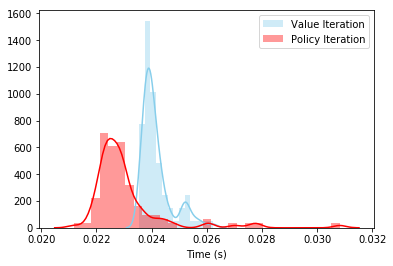

In [50]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''

pi_time = timeit.Timer('mdp.policy_iteration(gridmdp, k=1)', setup = setup).repeat(100,10)
vi_time = timeit.Timer('mdp.value_iteration(gridmdp, epsilon=0.5)', setup = setup).repeat(100,10)


times_df = pd.DataFrame({'Value Iteration':vi_time, 'Policy Iteration':pi_time})

sns.distplot( times_df["Value Iteration"] , color="skyblue", label="Value Iteration")
sns.distplot( times_df["Policy Iteration"] , color="red", label="Policy Iteration")
plt.xlabel("Time (s)")
plt.legend()

Text(0,0.5,'Time (s)')

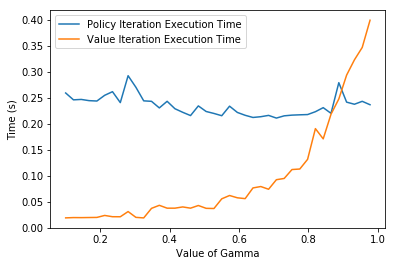

In [60]:
setup = '''
import mdp

gridmdp = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)], gamma={})
'''

setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp, k=1)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp, epsilon=0.5)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")

In [ ]:
setup = '''
import mdp

gridmdp_large = mdp.GridMDP([[-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04],
                   [-0.04, None, -0.04, -0.04, -0.04, None, -0.04, +1],
                   [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1]],
                   terminals=[(7, 0), (7, 1)])
'''



pi_klist = ['mdp.policy_iteration(gridmdp_large, k={})'.format(x) for x in range(1,25)]
pi_times, vi_times = [], []
for k_pi_call in pi_klist:
    pi_times.append(timeit.timeit(k_pi_call, number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("k")
plt.ylabel("Time (s)")

In [ ]:
setup_list = [setup.format("0." + x*"9") for x in range(1,15)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp_large, k=1)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(pi_times, label='Policy Iteration Execution Time')
plt.plot(vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Number of 9s after Decimal Point in Gamma")
plt.ylabel("Time (s)")

In [ ]:
setup_list = [setup.format(x) for x in np.linspace(.1,1,40, endpoint=False)]

pi_times = []
vi_times = []

for setup in setup_list:
    pi_times.append(timeit.timeit('mdp.policy_iteration(gridmdp_large, k=1)', number = 100, setup=setup))
    vi_times.append(timeit.timeit('mdp.value_iteration(gridmdp_large)', number = 100, setup=setup))

plt.plot(np.linspace(.1,1,40, endpoint=False), pi_times, label='Policy Iteration Execution Time')
plt.plot(np.linspace(.1,1,40, endpoint=False), vi_times, label='Value Iteration Execution Time')
plt.legend()
plt.xlabel("Value of Gamma")
plt.ylabel("Time (s)")